In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ================================
# 1. LOAD AND MERGE
# ================================
plt.rcParams['figure.dpi'] = 150

files = [
    'api_data_aadhar_biometric_0_500000.csv',
    'api_data_aadhar_biometric_500000_1000000.csv',
    'api_data_aadhar_biometric_1000000_1500000.csv',
    'api_data_aadhar_biometric_1500000_1861108.csv'
]
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [3]:
# ================================
# 2. DATA CLEANING
# ================================
df.drop_duplicates(inplace=True)

df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# State normalization
df['state'] = df['state'].str.strip().str.lower()

state_map = {
    "west bangal": "west bengal",
    "orissa": "odisha",
    "telangana": "telangana"
}

df['state'] = df['state'].replace(state_map).str.title()

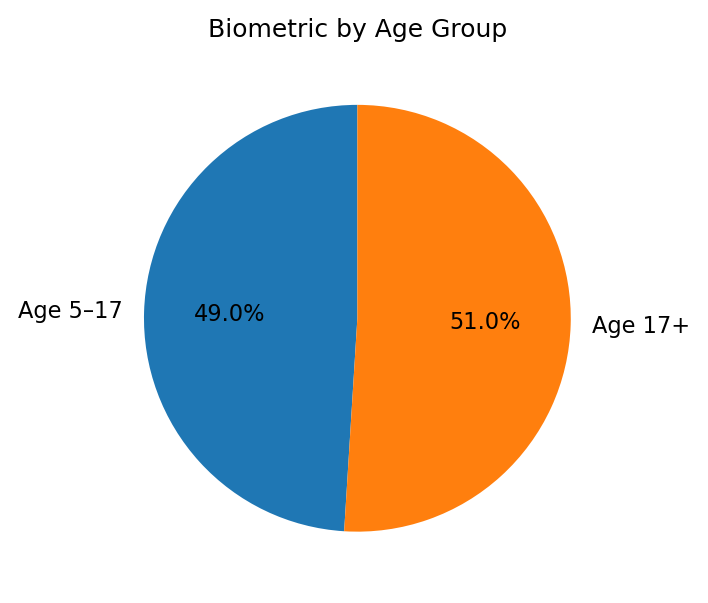

In [4]:
# ================================
# 3. AGE GROUP DISTRIBUTION
# ================================
age_totals = {
    'Age 5–17': df['bio_age_5_17'].sum(),
    'Age 17+': df['bio_age_17_'].sum()
}

plt.figure(figsize=(4, 4), dpi=180)
plt.pie(
    age_totals.values(),
    labels=age_totals.keys(),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
plt.title("Biometric by Age Group", fontsize=10)
plt.tight_layout()
plt.show()

### Biometric Authentication by Age Group

This pie chart shows the distribution of Aadhaar biometric authentications across two age groups: 5–17 years and 17+ years. The visualization highlights that the majority of biometric activity is contributed by individuals aged 17 and above, indicating higher reliance on biometric-based services among adults.

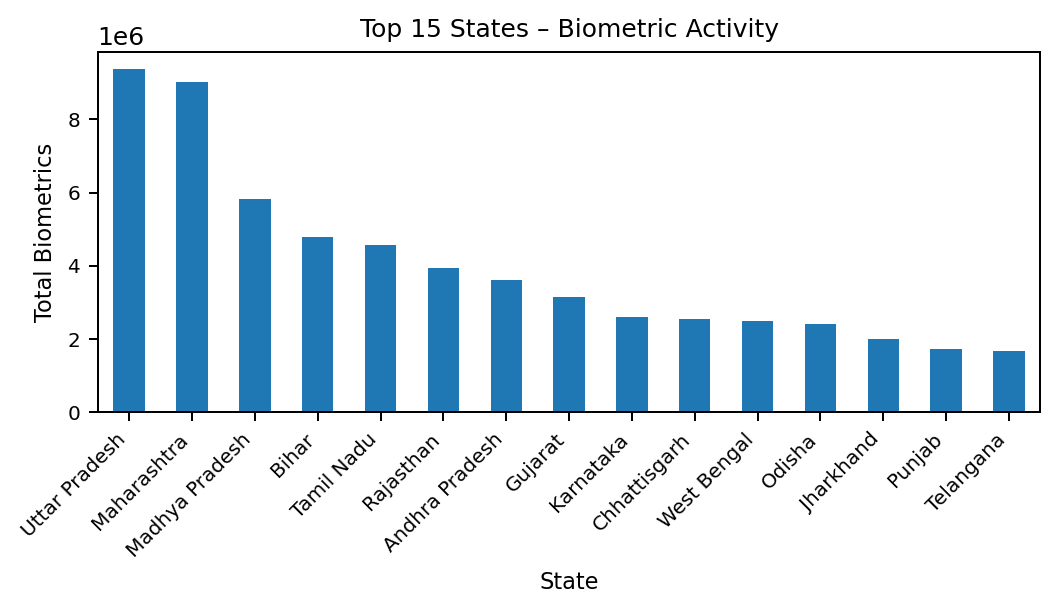

In [5]:
# ================================
# 4. STATE-WISE BIOMETRIC ACTIVITY
# ================================
df['total_biometrics'] = df['bio_age_5_17'] + df['bio_age_17_']

state_totals = (
    df.groupby('state')['total_biometrics']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(6, 3.5), dpi=180)
state_totals.plot(kind='bar')
plt.title("Top 15 States – Biometric Activity", fontsize=10)
plt.xlabel("State", fontsize=9)
plt.ylabel("Total Biometrics", fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### State-wise Biometric Authentication Activity

This bar chart displays the top 15 states based on total Aadhaar biometric authentications. It highlights regional differences in biometric usage and shows that biometric activity is concentrated in a few high-performing states, reflecting varying levels of digital service adoption across India.

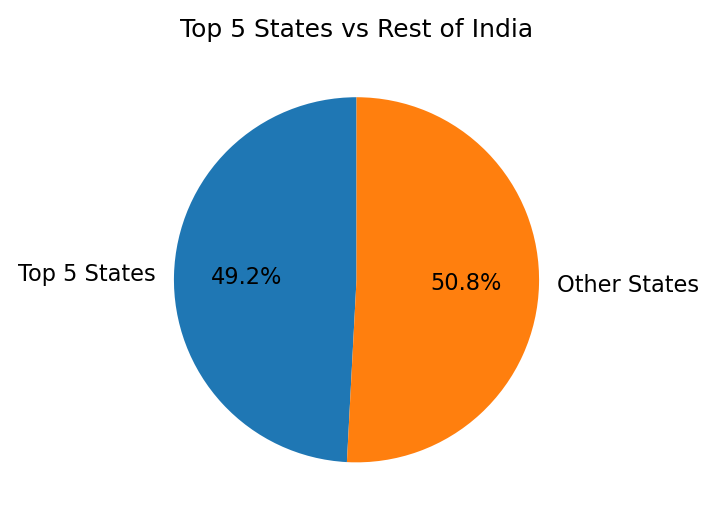

In [6]:
## 5. Top 5 States vs Rest of India
top5_states = (
    df.groupby('state')['total_biometrics']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top5_sum = top5_states.sum()
others_sum = df['total_biometrics'].sum() - top5_sum

plt.figure(figsize=(4, 4), dpi=180)
plt.pie(
    [top5_sum, others_sum],
    labels=['Top 5 States', 'Other States'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
plt.title("Top 5 States vs Rest of India", fontsize=10)
plt.tight_layout()
plt.show()

### Top 5 States vs Rest of India

This pie chart compares the biometric authentication contribution of the top five states - Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu with the rest of the country. The visualization shows that a small number of states account for a large share of Aadhaar biometric activity, highlighting regional concentration in biometric usage.

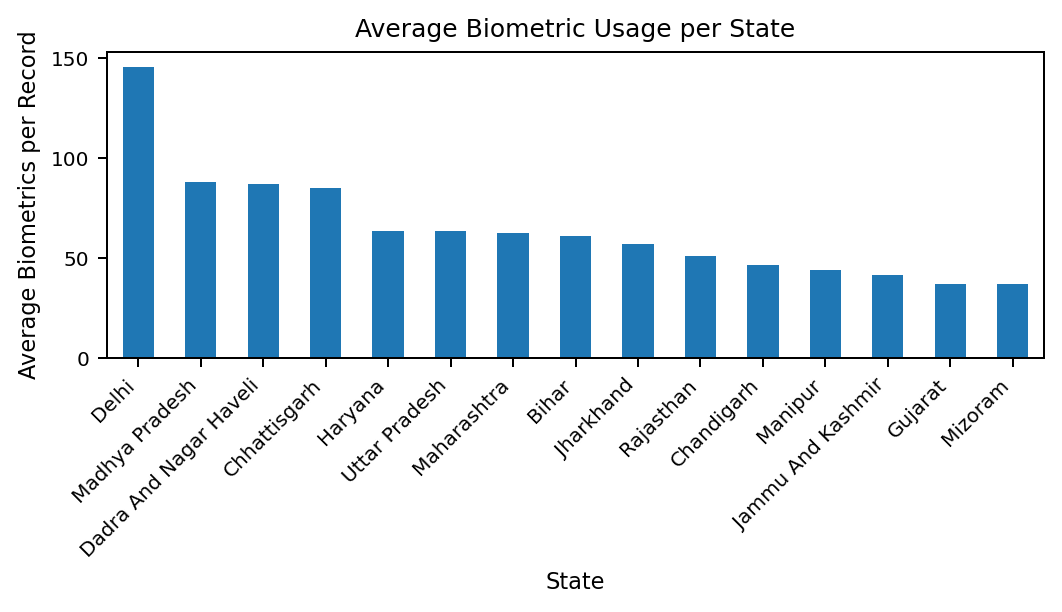

In [7]:
## 6. Average Biometric Usage per State
state_average = (
    df.groupby('state')['total_biometrics']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(6, 3.5), dpi=180)
state_average.plot(kind='bar')
plt.title("Average Biometric Usage per State", fontsize=10)
plt.xlabel("State", fontsize=9)
plt.ylabel("Average Biometrics per Record", fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Average Biometric Usage per State

This bar chart shows the average number of biometric authentications per record for each state. Unlike total counts, this visualization highlights states where biometric usage intensity is higher.

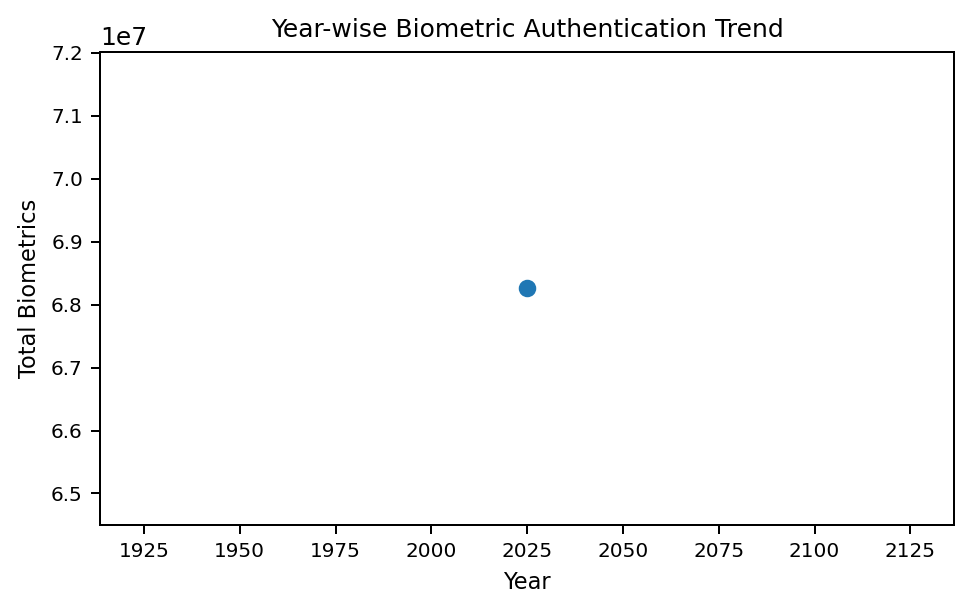

In [8]:
## 7. Year-wise Biometric Authentication Trend
df['year'] = df['date'].dt.year

yearly_trend = df.groupby('year')['total_biometrics'].sum()

plt.figure(figsize=(5.5, 3.5), dpi=180)
yearly_trend.plot(marker='o')
plt.title("Year-wise Biometric Authentication Trend", fontsize=10)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Total Biometrics", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Year-wise Biometric Authentication Trend

This line graph shows the trend of Aadhaar biometric authentication over the years. An upward trend indicates increasing adoption of biometric-based identity verification across India.